# Image Recognition Model

## Importing Libraries

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras import layers 
from tensorflow.keras import Sequential 
from tensorflow.keras.utils import to_categorical

# Checking TensorFlow version
print(tf.__version__)

2024-05-18 13:43:50.725023: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-18 13:43:56.670926: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.16.1


## Importing Dataset

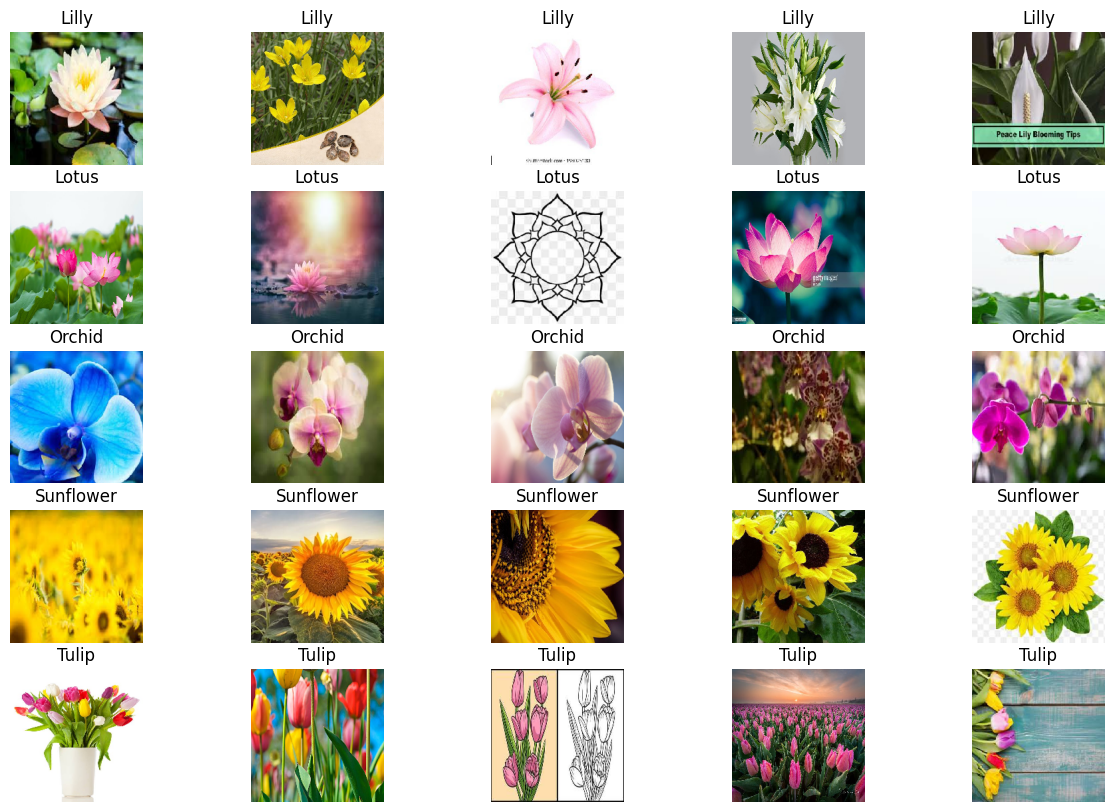

Training Set Class Distribution: {'Lilly': 784, 'Lotus': 810, 'Orchid': 808, 'Sunflower': 790, 'Tulip': 808}


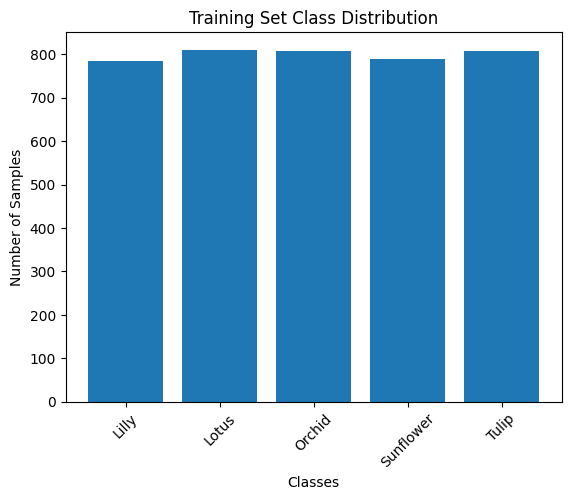

Testing Set Class Distribution: {'Lilly': 216, 'Lotus': 190, 'Orchid': 192, 'Sunflower': 210, 'Tulip': 192}


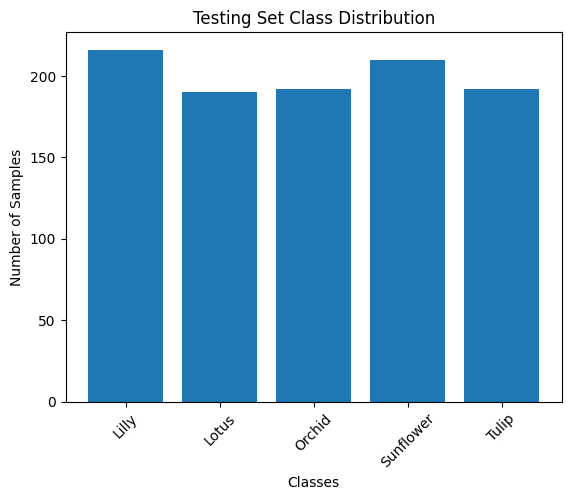

In [2]:
data_dir = 'flower_images'

# List of flower classes (subdirectories)
classes = os.listdir(data_dir)
num_classes = len(classes)

# Initialize lists to store images and labels
X = []
y = []

# Load images and labels
for i, cls in enumerate(classes):
    class_dir = os.path.join(data_dir, cls)
    images = os.listdir(class_dir)
    for img_name in images:
        img_path = os.path.join(class_dir, img_name)
        img = load_img(img_path, target_size=(200,200))  # Load high-resolution images
        img_array = img_to_array(img)
        X.append(img_array)
        y.append(i)  # Assign label to image

# Convert lists to arrays
X = np.array(X)
y = np.array(y)

# One-hot encode labels
y = to_categorical(y, num_classes=num_classes)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


num_samples_per_class = 5
plt.figure(figsize=(15, 10))

for i, cls in enumerate(classes):
    class_indices = np.where(np.argmax(y_train, axis=1) == i)[0]
    sampled_indices = np.random.choice(class_indices, num_samples_per_class, replace=False)
    for j, idx in enumerate(sampled_indices):
        plt.subplot(len(classes), num_samples_per_class, i * num_samples_per_class + j + 1)
        plt.imshow(X_train[idx].astype(np.uint8))
        plt.title(cls)
        plt.axis('off')

plt.show()

class_distribution_train = {cls: np.sum(np.argmax(y_train, axis=1) == i) for i, cls in enumerate(classes)}
print("Training Set Class Distribution:", class_distribution_train)

plt.bar(class_distribution_train.keys(), class_distribution_train.values())
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.title('Training Set Class Distribution')
plt.xticks(rotation=45)
plt.show()

class_distribution_test = {cls: np.sum(np.argmax(y_test, axis=1) == i) for i, cls in enumerate(classes)}
print("Testing Set Class Distribution:", class_distribution_test)

plt.bar(class_distribution_test.keys(), class_distribution_test.values())
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.title('Testing Set Class Distribution')
plt.xticks(rotation=45)
plt.show()

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

## Preprocessing the Data

Explained Variance Ratio: [0.45855957 0.05385609 0.03980189 0.03096585 0.01959875 0.0157916
 0.01480135 0.01158678 0.00923923 0.00795421 0.00766852 0.00698698
 0.00677263 0.00580034 0.00551085 0.00467864 0.00441952 0.00417785
 0.00378305 0.00373882 0.00365298 0.00352272 0.00310317 0.00299443
 0.0028523  0.00283083 0.00256089 0.00242255 0.00238381 0.00223483
 0.00218881 0.0021833  0.00204517 0.00200137 0.00198489 0.00191442
 0.00182389 0.00178907 0.00174724 0.00171745 0.00167639 0.0016268
 0.00159256 0.001553   0.00151473 0.00148866 0.00144603 0.00139651
 0.00138544 0.00136048]


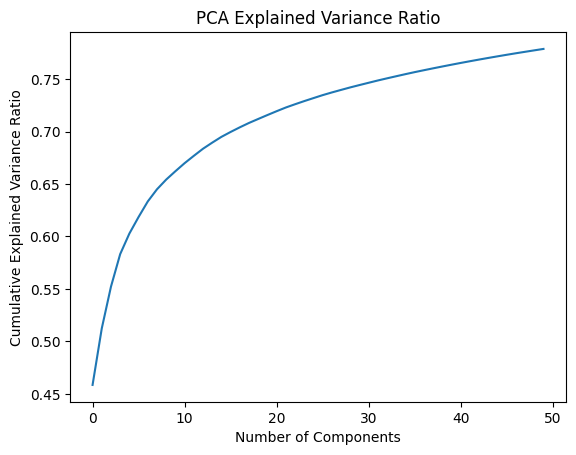

In [3]:
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_flattened)

X_test_flattened = X_test.reshape(X_test.shape[0], -1)
X_test_pca = pca.transform(X_test_flattened)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA Explained Variance Ratio')
plt.show()

## Defining the Model

In [4]:
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

/run/media/jaswin/Data/Class/College/NM/Oracle AI Project/final-code/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-18 13:44:27.223797: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-18 13:44:27.362124: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.

## Training and Testing the Model

2024-05-18 13:44:27.824981: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1920000000 exceeds 10% of free system memory.
2024-05-18 13:44:29.569881: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1920000000 exceeds 10% of free system memory.


Epoch 1/22


I0000 00:00:1716020071.833042    2761 service.cc:145] XLA service 0x7b91bc0052b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1716020071.833079    2761 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-05-18 13:44:31.893887: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-18 13:44:32.093047: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 10/250 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.2189 - loss: 543.8192

I0000 00:00:1716020075.870952    2761 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2382 - loss: 62.6384

2024-05-18 13:44:40.469100: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 480000000 exceeds 10% of free system memory.
2024-05-18 13:44:40.909429: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 480000000 exceeds 10% of free system memory.


250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.2381 - loss: 62.4447 - val_accuracy: 0.2260 - val_loss: 1.5897
Epoch 2/22
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.2736 - loss: 1.6232 - val_accuracy: 0.3020 - val_loss: 1.5177
Epoch 3/22
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.3461 - loss: 1.4888 - val_accuracy: 0.2960 - val_loss: 1.5018
Epoch 4/22
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.3887 - loss: 1.4054 - val_accuracy: 0.3170 - val_loss: 1.5756
Epoch 5/22
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.4344 - loss: 1.2806 - val_accuracy: 0.3930 - val_loss: 1.4536
Epoch 6/22
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.4631 - loss: 1.2771 - val_accuracy: 0.4780 - val_loss: 1.3477
Epoch 7/22
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.5763 - loss: 1.0257 - val_accuracy: 0.4890 - val_loss: 1.4659
Epoch 8/22
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.6216 - loss: 0.9205 - val_accuracy: 0.5

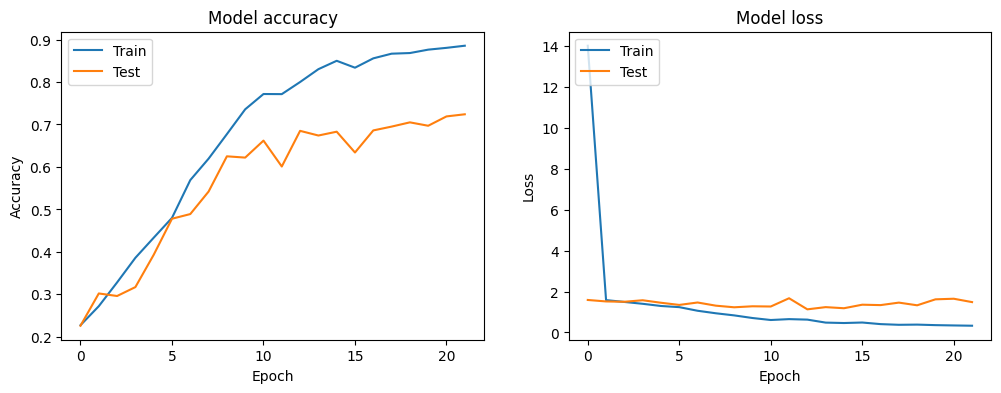

2024-05-18 13:46:33.071291: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 480000000 exceeds 10% of free system memory.


32/32 - 2s - 56ms/step - accuracy: 0.7240 - loss: 1.4851
Test accuracy: 0.7239999771118164


In [5]:
history = model.fit(X_train, y_train, epochs=22, 
                    validation_data=(X_test, y_test), 
                    batch_size=16)

model.save('flower_detection.keras')

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

keras.backend.clear_session()